Advanced Convolutional Neural Networks (CNNs) with CIFAR-10 dataset
=========

In this tutorial we will learn how to use more complex CNNs, showing that the training of a __deeper__ CNN can improve the performance of the model. We will also explore the concept of __data augmentation__ to understand how to increase the variability of the training set by, for example, rotating the original images to generate new training stimuli.

This tutorail will use the CIFAR-10 training set.


**CNN for CIFAR-10**

To work with more complex CNNs, we will now use a more complex training dataset called __CIFAR-10__. https://www.cs.toronto.edu/~kriz/cifar.html . CIFAR-10 is a benchamark machine learning set of low-resolution, colour images. It includes 60000 32x32 colour (using 3 RGB colour channels) images in these 10 classes of objects: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. Each class has 6000. There are 50000 training images and 10000 test images. This dataset is enclosed in the default Anaconda KERAS package. 


# **Initialisation of the program**

The program starts with the importing of typical Keras and other Python service modules. 

In [2]:
# importing of modules for CIFAR-10 CNN 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [3]:
import tensorflow as tf

The following constant and variable definitions are needed for the network and training parameters.


In [4]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

print('Main variables initialised.')

Main variables initialised.


Constant definition for the training set images

In [5]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


# __CIFAR-10 data loading and processing__

Loading and preparation of the CIFAR-10 training set.

In [6]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# **Visualisation of two sample CIFAR-10 images**

Here we will visualise two sample images from the dataset.

Sample input image: [[[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 ...

 [[0.44313726 0.47058824 0.4392157 ]
  [0.43529412 0.4627451  0.43529412]
  [0.4117647  0.4392157  0.41568628]
  ...
  [0.28235295 0.31764707 0.3137255 ]
  [0.28235295 0.3137255  0.30980393]
  [0.28235295 0.3137255  0.30980393]]

 [[0.43529412 0.4627451  0.43137255]
  [0.40784314 0.4

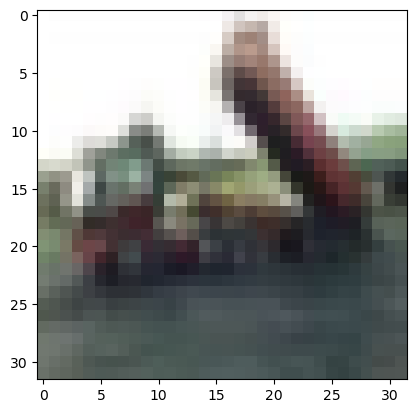

'Selected_Image = 3\nimage = input_X_train[Selected_Image]\nprint ("Sample input image: " + str(image))\nplt.imshow(image)\nplt.show() '

In [7]:
# visualisation of the numerical vector and 2D colour plot of the sample CIFAR imnage 2
Selected_Image = 2
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() 

'''Selected_Image = 3
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() '''


# __Configure the dataset for performance__

In [8]:
'''AUTOTUNE = tf.data.AUTOTUNE'''

'AUTOTUNE = tf.data.AUTOTUNE'

# **Simple CNN model definition**

This code defines a simple CNN network.
The model will learn 32 convolutional filters, each of a 3 x 3 size. The output dimension is the same one of the input shape, with a 32 x 32 filters (default stride of 1 is used). The activation function ReLU will be used. 
The network then has a max-pooling layer with pool size 2 x 2, and a dropout at 25%.

The next level of depth has a dense layer with 512 units and ReLU activation, followed by a dropout at 50%.
Finally, a softmax layer is used with 10 units/classes as output, i.e. one for each of the 10 classes of objects encoded with one-hot coding.

## Baseline: 1 Lab model

In [9]:
# network definition

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN network definition.')

CNN network definition.


**Model compilation**

This compiles the CNN model, and then shows its summary. 


In [11]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

**Training of the CNN**

This line of code trains the model, saving the results in the history variable.



In [13]:
# training/fitting of the DNN model

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/20
313/313 [==============================] - 20s 63ms/step - loss: 1.3079 - accuracy: 0.5388 - val_loss: 1.2074 - val_accuracy: 0.5759
Epoch 2/20
313/313 [==============================] - 20s 64ms/step - loss: 1.2013 - accuracy: 0.5784 - val_loss: 1.1559 - val_accuracy: 0.5973
Epoch 3/20
313/313 [==============================] - 20s 64ms/step - loss: 1.1175 - accuracy: 0.6084 - val_loss: 1.2184 - val_accuracy: 0.5808
Epoch 4/20
313/313 [==============================] - 20s 63ms/step - loss: 1.0471 - accuracy: 0.6315 - val_loss: 1.1083 - val_accuracy: 0.6154
Epoch 5/20
313/313 [==============================] - 19s 60ms/step - loss: 0.9929 - accuracy: 0.6524 - val_loss: 1.0527 - val_accuracy: 0.6334
Epoch 6/20
313/313 [==============================] - 19s 60ms/step - loss: 0.9448 - accuracy: 0.6682 - val_loss: 1.1160 - val_accuracy: 0.6190
Epoch 7/20
313/313 [==============================] - 19s 60ms/step - loss: 0.8993 - accuracy: 0.6873 - val_loss: 1.0627 - val_accuracy:

**Saving of the model and of the trained weights**

This saves the model definition and the weights, after training.



In [9]:
"""#save model in json format into a file
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar10_weights.h5', overwrite=True)

print('Files saved for model definition and for weights.')"""

Files saved for model definition and for weights.


**Analysis of the results**

This code generates the test scores, so we can visualise and inspect the model's peformance.

It also plots the accuracy and loss values along the training timescale.


79/79 [==============================] - 1s 12ms/step - loss: 1.1600 - accuracy: 0.6662

Test score/loss: 1.1600341796875
Test accuracy: 0.6661999821662903
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


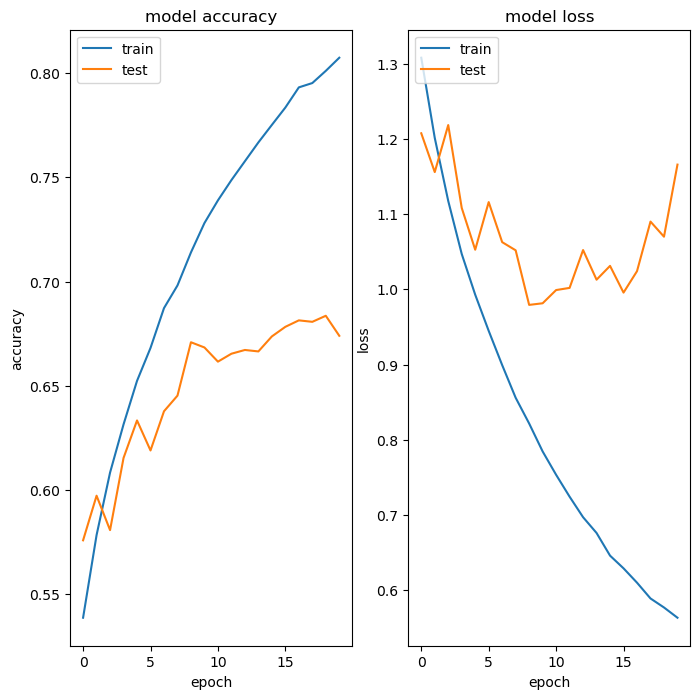

In [14]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [16]:
import pandas as pd

In [19]:
# 5 runs
result_df = pd.DataFrame(columns=['accuracy', 'loss'])
for i in range(5):
    print(f'{i} run------------------------')
    # network definition
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(N_CLASSES))
    model.add(Activation('softmax'))

    print('CNN network definition.')

    model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
    # training/fitting of the DNN model
    history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

    #Testing
    score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
    print("\nTest score/loss:", score[0])
    print('Test accuracy:', score[1])
    result_df.loc[i, 'accuracy'] = score[1]
    result_df.loc[i, 'loss'] = score[0]

0 run------------------------
CNN network definition.
Epoch 1/20
313/313 [==============================] - 21s 64ms/step - loss: 1.6851 - accuracy: 0.4015 - val_loss: 1.3551 - val_accuracy: 0.5181
Epoch 2/20
313/313 [==============================] - 19s 61ms/step - loss: 1.3453 - accuracy: 0.5242 - val_loss: 1.2623 - val_accuracy: 0.5482
Epoch 3/20
313/313 [==============================] - 18s 59ms/step - loss: 1.2141 - accuracy: 0.5709 - val_loss: 1.1909 - val_accuracy: 0.5850
Epoch 4/20
313/313 [==============================] - 18s 59ms/step - loss: 1.1234 - accuracy: 0.6053 - val_loss: 1.0999 - val_accuracy: 0.6139
Epoch 5/20
313/313 [==============================] - 19s 60ms/step - loss: 1.0515 - accuracy: 0.6309 - val_loss: 1.0915 - val_accuracy: 0.6215
Epoch 6/20
313/313 [==============================] - 19s 59ms/step - loss: 0.9858 - accuracy: 0.6578 - val_loss: 1.0823 - val_accuracy: 0.6196
Epoch 7/20
313/313 [==============================] - 19s 60ms/step - loss: 0.9362

In [20]:
result_df

,accuracy,loss
0,0.6816,1.047617
1,0.6657,1.037859
2,0.675,1.041924
3,0.6724,1.09073
4,0.6671,1.091653


In [21]:
result_df[['accuracy', 'loss']].mean()

accuracy    0.672360
loss        1.061957
dtype: float64

79/79 [==============================] - 1s 11ms/step - loss: 1.0917 - accuracy: 0.6671

Test score/loss: 1.0916533470153809
Test accuracy: 0.6671000123023987
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


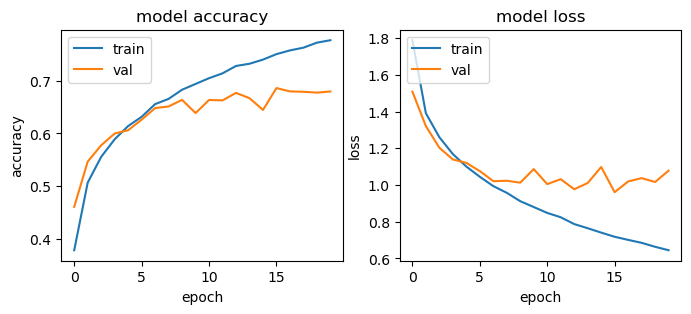

In [27]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Model 2: Deeper model

In [35]:
# 5 runs
result_df = pd.DataFrame(columns=['accuracy', 'loss'])
for i in range(5):
    print(f'{i} run------------------------')
    # network definition

    deeper_model = Sequential()
    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
    deeper_model.add(Dropout(0.25))

    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
    deeper_model.add(Dropout(0.25))

    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    deeper_model.add(Activation('relu'))
    deeper_model.add(MaxPooling2D(pool_size=(2, 2)))
    deeper_model.add(Dropout(0.25))
    
    deeper_model.add(Flatten())
    deeper_model.add(Dense(512))
    deeper_model.add(Activation('relu'))
    deeper_model.add(Dropout(0.5))

    deeper_model.add(Flatten())
    deeper_model.add(Dense(512))
    deeper_model.add(Activation('relu'))
    deeper_model.add(Dropout(0.5))

    deeper_model.add(Dense(N_CLASSES))
    deeper_model.add(Activation('softmax'))

    print('CNN network definition.')


    deeper_model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
    # training/fitting of the DNN model
    history = deeper_model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

    #Testing
    score = deeper_model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
    print("\nTest score/loss:", score[0])
    print('Test accuracy:', score[1])
    result_df.loc[i, 'accuracy'] = score[1]
    result_df.loc[i, 'loss'] = score[0]

0 run------------------------
CNN network definition.
Epoch 1/20
313/313 [==============================] - 31s 95ms/step - loss: 1.9853 - accuracy: 0.2659 - val_loss: 1.7646 - val_accuracy: 0.3590
Epoch 2/20
313/313 [==============================] - 27s 87ms/step - loss: 1.6270 - accuracy: 0.4027 - val_loss: 1.4378 - val_accuracy: 0.4808
Epoch 3/20
313/313 [==============================] - 25s 79ms/step - loss: 1.4690 - accuracy: 0.4640 - val_loss: 1.5145 - val_accuracy: 0.4685
Epoch 4/20
313/313 [==============================] - 26s 84ms/step - loss: 1.3469 - accuracy: 0.5128 - val_loss: 1.3551 - val_accuracy: 0.5167
Epoch 5/20
313/313 [==============================] - 26s 82ms/step - loss: 1.2530 - accuracy: 0.5516 - val_loss: 1.4691 - val_accuracy: 0.5077
Epoch 6/20
313/313 [==============================] - 26s 83ms/step - loss: 1.1881 - accuracy: 0.5784 - val_loss: 1.0448 - val_accuracy: 0.6347
Epoch 7/20
313/313 [==============================] - 28s 90ms/step - loss: 1.1275

Exception ignored in: <function UniquePtr.__del__ at 0x0000024B51A0EB80>
Traceback (most recent call last):
  File "c:\Users\1192k\anaconda3\envs\sml1\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 71, in __del__
    obj = self._obj
AttributeError: _obj


313/313 [==============================] - 34s 103ms/step - loss: 2.0322 - accuracy: 0.2506 - val_loss: 1.7834 - val_accuracy: 0.3484
Epoch 2/20
313/313 [==============================] - 29s 94ms/step - loss: 1.6662 - accuracy: 0.3902 - val_loss: 1.4445 - val_accuracy: 0.4642
Epoch 3/20
313/313 [==============================] - 30s 95ms/step - loss: 1.4986 - accuracy: 0.4536 - val_loss: 1.4717 - val_accuracy: 0.4597
Epoch 4/20
313/313 [==============================] - 27s 86ms/step - loss: 1.3864 - accuracy: 0.4990 - val_loss: 1.3315 - val_accuracy: 0.5093
Epoch 5/20
313/313 [==============================] - 25s 80ms/step - loss: 1.2942 - accuracy: 0.5376 - val_loss: 1.1481 - val_accuracy: 0.5842
Epoch 6/20
313/313 [==============================] - 27s 88ms/step - loss: 1.2247 - accuracy: 0.5646 - val_loss: 1.1222 - val_accuracy: 0.6030
Epoch 7/20
313/313 [==============================] - 30s 96ms/step - loss: 1.1633 - accuracy: 0.5862 - val_loss: 1.0068 - val_accuracy: 0.6365
Ep

In [36]:
result_df

,accuracy,loss
0,0.7216,0.840658
1,0.7149,0.821284
2,0.7159,0.831369
3,0.7328,0.782519
4,0.7293,0.787563


In [37]:
result_df[['accuracy', 'loss']].mean()

accuracy    0.722900
loss        0.812679
dtype: float64

In [ ]:
#Testing
score = deeper_model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# Parameter Tuning

In [74]:
from hyperopt import hp
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.layers import PReLU
from sklearn.preprocessing import StandardScaler

# Baseline Parameter
base_param = {
    'input_dropout': 0.0,
    'hidden_layers': 3,
    'hidden_units': 96,
    'hidden_activation': 'relu',
    'hidden_dropout': 0.2,
    'batch_norm': 'before_act',
    'optimizer': {'type': 'adam', 'lr': 0.001},
    'batch_size': 64,
}

# Set exploration space
param_space = {
    'input_dropout': hp.quniform('input_dropout', 0, 0.2, 0.05),
    'hidden_layers': hp.quniform('hidden_layers', 2, 4, 1),
    'hidden_units': hp.quniform('hidden_units', 32, 256, 32),
    'hidden_activation': hp.choice('hidden_activation', ['prelu', 'relu']),
    'hidden_dropout': hp.quniform('hidden_dropout', 0, 0.3, 0.05),
    'batch_norm': hp.choice('batch_norm', ['before_act', 'no']),
    'optimizer': hp.choice('optimizer', 
                           [{'type': 'adam', 'lr': hp.loguniform('adam_lr', np.log(0.0001), np.log(0.1))},
                            {'type': 'rmsprop', 'lr': hp.loguniform('rmsprop_lr', np.log(0.0001), np.log(0.1))},
                            {'type': 'sgd', 'lr': hp.loguniform('sgd_lr', np.log(0.0001), np.log(0.1))}]),
    'batch_size': hp.quniform('batch_size', 32, 128, 32),
}

class CNN_parameter_tuning:
    def __init__(self, params) -> None:
        self.params = params
        self.scaler = None
        self.model = None
    
    def fit(self, tr_x, tr_y, val_x, val_y):

        # parameter setting
        input_dropout = self.params['input_dropout']
        hidden_layers = int(self.params['hidden_layers'])
        hidden_units = int(self.params['hidden_units'])
        hidden_activation = self.params['hidden_activation']
        hidden_dropout = self.params['hidden_dropout']
        batch_norm = self.params['batch_norm']
        optimizer_type = self.params['optimizer']['type']
        optimizer_lr = self.params['optimizer']['lr']
        batch_size = int(self.params['batch_size'])

        self.model = Sequential()

        # Input layer
        # self.model.add(Dropout(input_dropout, input_shape=(tr_x.shape[1],)))

        # Hidden layers
        for i in range(hidden_layers):
            self.model.add(Dense(hidden_units))
            if batch_norm == 'before_act':
                self.model.add(BatchNormalization())
            if hidden_activation == 'prelu':
                self.model.add(PReLU())
            elif hidden_activation == 'relu':
                self.model.add(Activation('relu'))
            else:
                raise NotImplementedError
            self.model.add(Dropout(hidden_dropout))

        # Output layer
        self.model.add(Flatten())
        self.model.add(Dense(512, activation='relu'))
        self.add(Dropout(0.5))
        self.model.add(Dense(N_CLASSES, activation='softmax'))

        # Optimizer

# Parameter tuning 2
- https://www.analyticsvidhya.com/blog/2021/06/create-convolutional-neural-network-model-and-optimize-using-keras-tuner-deep-learning/
- https://www.kaggle.com/code/rahulkumarpatro/optimising-cnn-using-keras-tuner


In [79]:
def build_model(hp):
    # create model object
    model = Sequential()
    model.add(Conv2D(
        #adding filter
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
        activation='relu',
        padding='same',
        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)
    )),
    model.add(Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
        activation='relu',
        padding='same'
    )),
    model.add(MaxPooling2D(pool_size=(2,2))),
    model.add(Flatten()),
    model.add(Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu',
    )),
    model.add(Dropout(0.5)),
    model.add(Dense(N_CLASSES, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

    return model


In [80]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

tuner_search = RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='output', project_name="Mnist Fashion")

In [82]:
tuner_search.search(input_X_train, output_Y_train, epochs=3, validation_split=VALIDATION_SPLIT)

Trial 5 Complete [00h 03m 44s]
val_accuracy: 0.5946999788284302

Best val_accuracy So Far: 0.6151000261306763
Total elapsed time: 00h 16m 07s
INFO:tensorflow:Oracle triggered exit


In [83]:
model = tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 48)        3648      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 48)        20784     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 48)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 96)                1179744   
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                        

## Parameter Tuning 3
Tensorflow tutorial
- https://www.tensorflow.org/tutorials/keras/keras_tuner

In [84]:
def build_model_tutorial(hp):
    # create model object
    model = Sequential()
    model.add(Conv2D(
        #adding filter
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
        activation='relu',
        padding='same',
        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)
    )),
    model.add(Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
        activation='relu',
        padding='same'
    )),
    model.add(MaxPooling2D(pool_size=(2,2))),
    model.add(Flatten()),
    model.add(Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu',
    )),
    model.add(Dropout(0.5)),
    model.add(Dense(N_CLASSES, activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(learning_rate=hp_learning_rate), 
                  metrics=['accuracy'])

    return model


In [86]:
import keras_tuner as kt

tuner = kt.Hyperband(build_model_tutorial,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                        project_name='intro_to_kt')


In [87]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [88]:
tuner.search(input_X_train, output_Y_train, epochs=50, validation_split=VALIDATION_SPLIT, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 30 Complete [06h 04m 38s]
val_accuracy: 0.10249999910593033

Best val_accuracy So Far: 0.6567000150680542
Total elapsed time: 08h 40m 20s
INFO:tensorflow:Oracle triggered exit


KeyError: 'units does not exist.'

In [93]:
best_hps.get('conv_1_filter')

80

In [95]:
# Train the model with the optimal hyperparameters and run the trained model on the test set
model = tuner.hypermodel.build(best_hps)
history = model.fit(input_X_train, output_Y_train, epochs=50, validation_split=VALIDATION_SPLIT, callbacks=[stop_early])


Epoch 1/50
 547/1250 [============>.................] - ETA: 26s - loss: 1.8631 - accuracy: 0.3028

KeyboardInterrupt: 

In [ ]:

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Data Augmentation
-------------

To further improve the performance of the model, it is advisable to use a larger training set, to expose the network to more variations of the images.
One way to achieve this, without having to collect new images from the real world, is to __augment__ the existing images with multiple types of transformations of the dataset stimuli. This can include rotation of the image, rescaling, horizontal/vertical flip, zooming, channel shift, etc.

Below is an example of the code that augments the current datase.




In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")
    
datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift


Augmenting training set images...


__Training with augmented data__

The function below used the dynamic generation of the augmented data during the training (just in time).

In [15]:

#fit the dataset
datagen.fit(input_X_train)


# train by fitting the model on batches with real-time data augmentation
history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)



Epoch 1/40


C:\Users\1192k\AppData\Local\Temp\ipykernel_31684\3979763547.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)


390/390 [==============================] - 33s 83ms/step - loss: 1.4824 - accuracy: 0.4856
Epoch 2/40
390/390 [==============================] - 35s 91ms/step - loss: 1.4329 - accuracy: 0.5044
Epoch 3/40
390/390 [==============================] - 33s 84ms/step - loss: 1.4105 - accuracy: 0.5091
Epoch 4/40
390/390 [==============================] - 34s 86ms/step - loss: 1.3955 - accuracy: 0.5158
Epoch 5/40
390/390 [==============================] - 33s 83ms/step - loss: 1.3896 - accuracy: 0.5172
Epoch 6/40
390/390 [==============================] - 34s 87ms/step - loss: 1.3759 - accuracy: 0.5230
Epoch 7/40
390/390 [==============================] - 33s 84ms/step - loss: 1.3629 - accuracy: 0.5234
Epoch 8/40
390/390 [==============================] - 33s 86ms/step - loss: 1.3598 - accuracy: 0.5264
Epoch 9/40
390/390 [==============================] - 33s 85ms/step - loss: 1.3548 - accuracy: 0.5276
Epoch 10/40
390/390 [==============================] - 34s 87ms/step - loss: 1.3509 - accurac

**Analysis of the Data Augmented, Deeper CNN results**

This generates the test scores and plots for the deeper DNN trained on the augmented data.

79/79 [==============================] - 1s 16ms/step - loss: 1.1579 - accuracy: 0.5841

Test score/loss: 1.1578571796417236
Test accuracy: 0.5841000080108643
dict_keys(['loss', 'accuracy'])


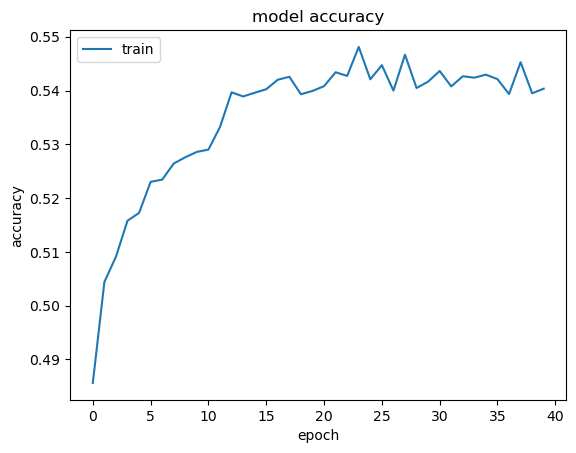

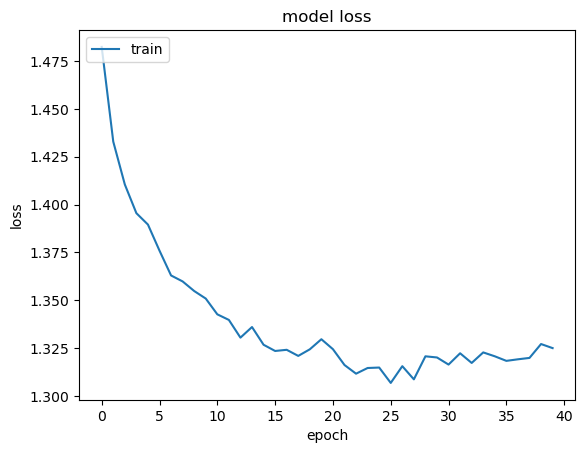

In [16]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [20]:
# want to add val plot
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(input_X_train, output_Y_train, test_size=VALIDATION_SPLIT, random_state=42)

# Train the model using data augmentation and validation data
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                              steps_per_epoch=X_train.shape[0]//BATCH_SIZE,
                              epochs=N_EPOCH,
                              verbose=VERBOSE,
                              validation_data=(X_val, Y_val))


C:\Users\1192k\AppData\Local\Temp\ipykernel_31684\3542207279.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),


Epoch 1/40
312/312 [==============================] - 34s 109ms/step - loss: 1.1027 - accuracy: 0.6200 - val_loss: 0.9239 - val_accuracy: 0.6679
Epoch 2/40
312/312 [==============================] - 38s 121ms/step - loss: 1.0804 - accuracy: 0.6296 - val_loss: 0.8757 - val_accuracy: 0.6913
Epoch 3/40
312/312 [==============================] - 33s 104ms/step - loss: 1.0778 - accuracy: 0.6337 - val_loss: 0.8734 - val_accuracy: 0.6931
Epoch 4/40
312/312 [==============================] - 31s 99ms/step - loss: 1.0687 - accuracy: 0.6339 - val_loss: 1.0162 - val_accuracy: 0.6454
Epoch 5/40
312/312 [==============================] - 32s 102ms/step - loss: 1.0604 - accuracy: 0.6353 - val_loss: 0.9898 - val_accuracy: 0.6536
Epoch 6/40
312/312 [==============================] - 30s 97ms/step - loss: 1.0576 - accuracy: 0.6375 - val_loss: 0.9435 - val_accuracy: 0.6722
Epoch 7/40
312/312 [==============================] - 32s 102ms/step - loss: 1.0495 - accuracy: 0.6403 - val_loss: 0.9529 - val_accu

79/79 [==============================] - 2s 20ms/step - loss: 0.8564 - accuracy: 0.7051

Test score/loss: 0.8564433455467224
Test accuracy: 0.7050999999046326
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


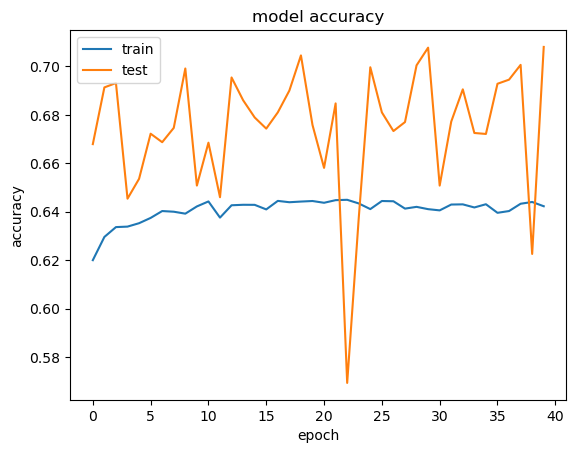

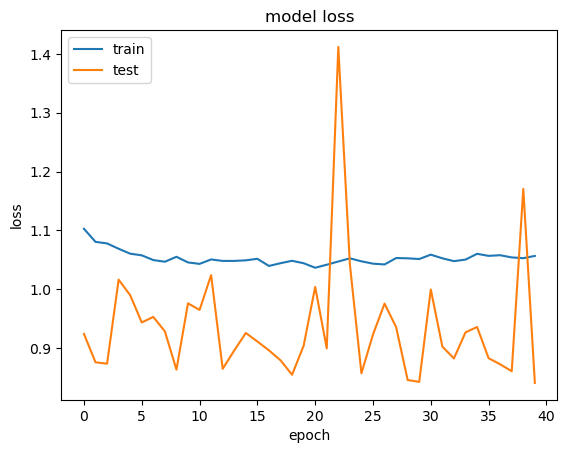

In [25]:
# Plot with validation data
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Below is a commented different example of a data augmentation approach. 

But we have carried out plenty of slow, long simulations for this class, and we can stop here.

In [17]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(input_X_train)

Conclusions
-------------

Today we learned to train more complex DNNs, and to use data augmentation to further improve the network training and performance.

**Copyright (c)** 2022 Angelo Cangelosi, MIT License. Code and examples adapted from Gulli & Pal (2017) Deep Learning with Kera. Punkt Publishing. With support from Wenjie Huang.